In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install git+https://github.com/PatBall1/detectree2.git

  Cloning https://github.com/PatBall1/detectree2.git to /tmp/pip-req-build-te8n0qo4
  Running command git clone --filter=blob:none --quiet https://github.com/PatBall1/detectree2.git /tmp/pip-req-build-te8n0qo4
ERROR: Operation cancelled by user


In [ ]:
!pip install DeepForest

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.6/39.6 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 7.3 MB/s eta 0:00:00


Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


No validation file provided. Turning off validation loop
Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


TypeError: unsupported operand type(s) for -: 'str' and 'str'

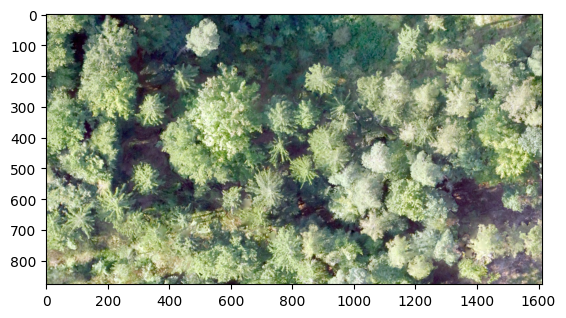

In [ ]:
from deepforest import main
from deepforest import get_data
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

model = main.deepforest()
model.use_release()

img_path = '/content/drive/MyDrive/skola/DeepForest/DeepForest.jpg'

sample_image_path = get_data(img_path)
raw_predictions = model.predict_image(path=sample_image_path, return_plot=False)

# Zobrazení obrázku
img = plt.imread(sample_image_path)
plt.imshow(img)

# Zvýraznění bounding boxů
for box in raw_predictions:
    xmin, ymin, xmax, ymax = box
    width = xmax - xmin
    height = ymax - ymin
    rect = Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)

# Uložení obrázku
output_path = '/content/drive/MyDrive/skola/DeepForest/output.jpg'
plt.savefig(output_path)
plt.show()






In [ ]:
raster_path = get_data(img_path)
# Window size of 300px with an overlap of 25% among windows for this small tile.
predicted_raster = model.predict_tile(raster_path, return_plot = True, patch_size=300,patch_overlap=0.25)

# View boxes overlayed when return_plot=True, when False, boxes are returned.
plt.imshow(predicted_raster)
plt.show()

In [ ]:
from detectree2.preprocessing.tiling import tile_data_train, to_traintest_folders
from detectree2.models.train import register_train_data, MyTrainer, setup_cfg
import rasterio
import geopandas as gpd
from pyproj import CRS

/usr/local/lib/python3.10/dist-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.3-CAPI-1.17.3) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [ ]:
site_path = "/content/drive/MyDrive/skola/diplomka_moje"
img_path = site_path + "/rgb/preveden_rgb_orto__Proje_2.tif"
crown_path = site_path + "/crowns/167.gpkg"

# Read in the tiff file

data = rasterio.open(img_path)

# Ověření, zda byl CRS úspěšně převeden
crowns = gpd.read_file(crown_path)
crowns = crowns.to_crs(data.crs.data) # making sure CRS match

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
buffer = 10
tile_width = 20
tile_height = 20
threshold = 0.40
appends = str(tile_width) + "_" + str(buffer) + "_" + str(threshold) # this helps keep file structure organised
out_dir = site_path + "/tiles_" + appends + "/"

In [ ]:
tile_data_train(data, out_dir, buffer, tile_width, tile_height, crowns, threshold)

Tiling complete


In [ ]:
data_folder = out_dir # data_folder is the folder where the .png, .tif, .geojson tiles have been stored
to_traintest_folders(data_folder, out_dir, test_frac=0.15, strict=True, folds=5)
# do not forget set "strict" to False

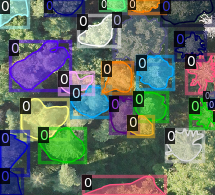

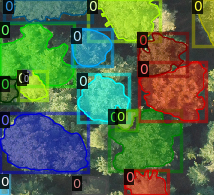

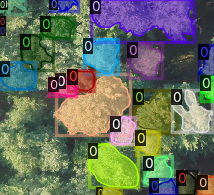

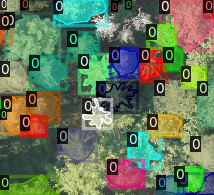

In [ ]:
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.utils.visualizer import Visualizer
from detectree2.models.train import combine_dicts, register_train_data
import random
import cv2
from PIL import Image

name = "diplomka_moje"
train_location = "/content/drive/MyDrive/skola/" + name + "/tiles_" + appends + "/train"
dataset_dicts = combine_dicts("/content/drive/MyDrive/skola/diplomka_moje/tiles_20_10_0.4/train", 3) # The number gives the fold to visualise
trees_metadata = MetadataCatalog.get(name + "_train")

for d in dataset_dicts:
   img = cv2.imread(d["file_name"])
   visualizer = Visualizer(img[:, :, ::-1], metadata=trees_metadata, scale=0.3)
   out = visualizer.draw_dataset_dict(d)
   image = cv2.cvtColor(out.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB)
   display(Image.fromarray(image))

In [ ]:
from detectree2.models.train import register_train_data, remove_registered_data

remove_registered_data("diplomka_moje_02")

KeyError: 'diplomka_moje_02_train'

In [ ]:
appends = "20_10_0.4"
train_location = "/content/drive/MyDrive/skola/diplomka_moje/tiles_" + appends + "/train/"
register_train_data(train_location, 'diplomka_moje', val_fold=2)

In [ ]:
train_location = "/content/drive/MyDrive/skola/diplomka_moje/tiles_" + appends + "/train/"
register_train_data(train_location, 'diplomka_moje_01', val_fold=2)

In [ ]:
train_location = "/content/drive/MyDrive/skola/diplomka_moje/tiles_" + appends + "/train/"
register_train_data(train_location, 'diplomka_moje_02', val_fold=2)

In [ ]:
base_model = "COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"

trains = ("diplomka_moje_train", "diplomka_moje_01_train", "diplomka_moje_02_train") # Registered train data
tests = ("diplomka_moje_val", "diplomka_moje_01_val", "diplomka_moje_02_val") # Registered validation data

out_dir = "/content/drive/MyDrive/skola"

cfg = setup_cfg(base_model, trains, tests, workers = 4, eval_period=50, max_iter=1500, out_dir=out_dir) # update_model arg can be used to load in trained  model

In [ ]:
!wget https://zenodo.org/records/10522461/files/230103_randresize_full.pth

--2024-02-25 15:59:06--  https://zenodo.org/records/10522461/files/230103_randresize_full.pth
Resolving zenodo.org (zenodo.org)... 188.184.103.159, 188.184.98.238, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.103.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 498209001 (475M) [application/octet-stream]
Saving to: ‘230103_randresize_full.pth’

230103_randresize_f 100%[===================>] 475.13M  22.7MB/s    in 22s     

2024-02-25 15:59:29 (21.8 MB/s) - ‘230103_randresize_full.pth’ saved [498209001/498209001]



In [ ]:
# Set the base (pre-trained) model from the detectron2 model_zoo
base_model = "COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"

# Set the updated model weights from the detectree2 pre-trained model
trained_model = "./230103_randresize_full.pth"

trains = ( "diplomka_moje_train", "diplomka_moje_01_train", "diplomka_moje_02_train") # Registered train data
tests = ("diplomka_moje_val",  "diplomka_moje_01_val", "diplomka_moje_02_val") # Registered validation data
out_dir = "/content/drive/MyDrive/skola"

cfg = setup_cfg(base_model, trains, tests, trained_model, workers = 4, eval_period=50, max_iter=1500, out_dir=out_dir) # update_model arg us

In [ ]:
trainer = MyTrainer(cfg, patience = 5)
trainer.resume_or_load(resume=False)
trainer.train()


[02/25 16:00:24 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[02/25 16:00:46 d2.utils.events]:  eta: 0:21:20  iter: 19  total_loss: 1.556  loss_cls: 0.3618  loss_box_reg: 0.5995  loss_mask: 0.3627  loss_rpn_cls: 0.1162  loss_rpn_loc: 0.1077    time: 0.8715  last_time: 0.8907  data_time: 0.0329  last_data_time: 0.0160   lr: 5.3944e-05  max_mem: 3520M
[02/25 16:01:07 d2.utils.events]:  eta: 0:21:20  iter: 39  total_loss: 1.423  loss_cls: 0.3297  loss_box_reg: 0.5446  loss_mask: 0.3277  loss_rpn_cls: 0.09065  loss_rpn_loc: 0.1095    time: 0.8799  last_time: 0.8873  data_time: 0.0127  last_data_time: 0.0076   lr: 0.00011037  max_mem: 3521M
[02/25 16:01:16 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|    tree    | 17           |
|            |              |
[02/25 16:01:16 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[02/25 16:01:16 d2.data.common]: Ser

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:01:16 d2.evaluation.evaluator]: Inference done 1/1. Dataloading: 0.0000 s/iter. Inference: 0.2084 s/iter. Eval: 0.1117 s/iter. Total: 0.3201 s/iter. ETA=0:00:00
[02/25 16:01:16 d2.evaluation.evaluator]: Total inference time: 0:00:00.402473 (0.402473 s / iter per device, on 1 devices)
[02/25 16:01:16 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.208431 s / iter per device, on 1 devices)
[02/25 16:01:17 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:01:17 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:01:17 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:01:17 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:01:17 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/25 16:01:17 d2.evaluation.fast_e

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:01:17 d2.evaluation.evaluator]: Total inference time: 0:00:00.336346 (0.336346 s / iter per device, on 1 devices)
[02/25 16:01:17 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.140071 s / iter per device, on 1 devices)
[02/25 16:01:17 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:01:17 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:01:17 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:01:17 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:01:17 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/25 16:01:17 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:01:17 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:01:18 d2.evaluation.evaluator]: Total inference time: 0:00:00.338052 (0.338052 s / iter per device, on 1 devices)
[02/25 16:01:18 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.139513 s / iter per device, on 1 devices)
[02/25 16:01:18 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:01:18 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:01:18 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:01:18 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:01:18 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:01:18 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:01:18 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:01:19 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[02/25 16:01:19 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[02/25 16:01:19 d2.data.common]: Serializing 1 elements to byte tensors and concatenating them all ...
[02/25 16:01:19 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [02/25 16:01:19 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[02/25 16:01:19 d2.evaluation.evaluator]: Start inference on 1 batches


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:01:19 d2.evaluation.evaluator]: Total inference time: 0:00:00.333335 (0.333335 s / iter per device, on 1 devices)
[02/25 16:01:19 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.141185 s / iter per device, on 1 devices)
[02/25 16:01:19 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:01:19 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:01:19 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:01:19 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:01:19 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/25 16:01:19 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:01:19 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:01:20 d2.evaluation.evaluator]: Total inference time: 0:00:00.333441 (0.333441 s / iter per device, on 1 devices)
[02/25 16:01:20 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.140910 s / iter per device, on 1 devices)
[02/25 16:01:20 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:01:20 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:01:20 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:01:20 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:01:20 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/25 16:01:20 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:01:20 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:01:21 d2.evaluation.evaluator]: Total inference time: 0:00:00.326132 (0.326132 s / iter per device, on 1 devices)
[02/25 16:01:21 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.139588 s / iter per device, on 1 devices)
[02/25 16:01:21 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:01:21 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:01:21 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:01:21 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:01:21 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:01:21 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:01:21 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:01:21 d2.evaluation.evaluator]: Total inference time: 0:00:00.330462 (0.330462 s / iter per device, on 1 devices)
[02/25 16:01:21 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.142908 s / iter per device, on 1 devices)
[02/25 16:01:21 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:01:21 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:01:21 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:01:21 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:01:21 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:01:21 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:01:21 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:01:22 d2.evaluation.evaluator]: Inference done 1/1. Dataloading: 0.0000 s/iter. Inference: 0.1404 s/iter. Eval: 0.1174 s/iter. Total: 0.2578 s/iter. ETA=0:00:00
[02/25 16:01:22 d2.evaluation.evaluator]: Total inference time: 0:00:00.341481 (0.341481 s / iter per device, on 1 devices)
[02/25 16:01:22 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.140443 s / iter per device, on 1 devices)
[02/25 16:01:22 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:01:22 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:01:22 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:01:22 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:01:22 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/25 16:01:22 d2.evaluation.fast_e

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:01:23 d2.evaluation.evaluator]: Total inference time: 0:00:00.325633 (0.325633 s / iter per device, on 1 devices)
[02/25 16:01:23 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.141594 s / iter per device, on 1 devices)
[02/25 16:01:23 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:01:23 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:01:23 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:01:23 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:01:23 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:01:23 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:01:23 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:01:23 d2.evaluation.evaluator]: Total inference time: 0:00:00.331274 (0.331274 s / iter per device, on 1 devices)
[02/25 16:01:23 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.138901 s / iter per device, on 1 devices)
[02/25 16:01:23 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:01:23 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:01:23 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:01:23 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:01:23 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/25 16:01:23 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:01:23 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:01:24 d2.evaluation.evaluator]: Total inference time: 0:00:00.362454 (0.362454 s / iter per device, on 1 devices)
[02/25 16:01:24 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.140115 s / iter per device, on 1 devices)
[02/25 16:01:24 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:01:24 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:01:24 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:01:24 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:01:24 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/25 16:01:24 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:01:24 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:01:25 d2.evaluation.evaluator]: Total inference time: 0:00:00.420247 (0.420247 s / iter per device, on 1 devices)
[02/25 16:01:25 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.142310 s / iter per device, on 1 devices)
[02/25 16:01:25 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:01:25 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:01:25 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:01:25 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:01:25 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/25 16:01:25 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:01:25 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.01 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:02:14 d2.evaluation.evaluator]: Inference done 1/1. Dataloading: 0.0000 s/iter. Inference: 0.1339 s/iter. Eval: 0.0717 s/iter. Total: 0.2056 s/iter. ETA=0:00:00
[02/25 16:02:14 d2.evaluation.evaluator]: Total inference time: 0:00:00.290729 (0.290729 s / iter per device, on 1 devices)
[02/25 16:02:14 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.133927 s / iter per device, on 1 devices)
[02/25 16:02:14 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:02:14 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:02:14 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:02:14 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:02:14 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/25 16:02:14 d2.evaluation.fast_e

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:02:15 d2.evaluation.evaluator]: Total inference time: 0:00:00.286100 (0.286100 s / iter per device, on 1 devices)
[02/25 16:02:15 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.131905 s / iter per device, on 1 devices)
[02/25 16:02:15 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:02:15 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:02:15 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:02:15 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:02:15 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:02:15 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:02:15 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:02:15 d2.evaluation.evaluator]: Total inference time: 0:00:00.296303 (0.296303 s / iter per device, on 1 devices)
[02/25 16:02:15 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.131840 s / iter per device, on 1 devices)
[02/25 16:02:15 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:02:15 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:02:15 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:02:15 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:02:15 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:02:15 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:02:15 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:02:16 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[02/25 16:02:16 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[02/25 16:02:16 d2.data.common]: Serializing 1 elements to byte tensors and concatenating them all ...
[02/25 16:02:16 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [02/25 16:02:16 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[02/25 16:02:16 d2.evaluation.evaluator]: Start inference on 1 batches


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:02:17 d2.evaluation.evaluator]: Total inference time: 0:00:00.283130 (0.283130 s / iter per device, on 1 devices)
[02/25 16:02:17 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.131733 s / iter per device, on 1 devices)
[02/25 16:02:17 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:02:17 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:02:17 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:02:17 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:02:17 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:02:17 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:02:17 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:02:17 d2.evaluation.evaluator]: Total inference time: 0:00:00.295195 (0.295195 s / iter per device, on 1 devices)
[02/25 16:02:17 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.133454 s / iter per device, on 1 devices)
[02/25 16:02:17 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:02:17 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:02:17 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:02:17 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:02:17 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:02:17 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:02:17 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.01 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:02:18 d2.evaluation.evaluator]: Total inference time: 0:00:00.367959 (0.367959 s / iter per device, on 1 devices)
[02/25 16:02:18 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.134300 s / iter per device, on 1 devices)
[02/25 16:02:18 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:02:18 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:02:18 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:02:18 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:02:18 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/25 16:02:18 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:02:18 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.01 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:02:19 d2.evaluation.evaluator]: Total inference time: 0:00:00.353869 (0.353869 s / iter per device, on 1 devices)
[02/25 16:02:19 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.134933 s / iter per device, on 1 devices)
[02/25 16:02:19 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:02:19 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:02:19 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:02:19 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:02:19 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:02:19 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:02:19 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:02:20 d2.evaluation.evaluator]: Inference done 1/1. Dataloading: 0.0000 s/iter. Inference: 0.1329 s/iter. Eval: 0.1031 s/iter. Total: 0.2360 s/iter. ETA=0:00:00
[02/25 16:02:20 d2.evaluation.evaluator]: Total inference time: 0:00:00.393828 (0.393828 s / iter per device, on 1 devices)
[02/25 16:02:20 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.132903 s / iter per device, on 1 devices)
[02/25 16:02:20 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:02:20 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:02:20 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:02:20 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:02:20 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:02:20 d2.evaluation.fast_e

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:02:21 d2.evaluation.evaluator]: Total inference time: 0:00:00.364725 (0.364725 s / iter per device, on 1 devices)
[02/25 16:02:21 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.134627 s / iter per device, on 1 devices)
[02/25 16:02:21 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:02:21 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:02:21 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:02:21 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:02:21 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:02:21 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:02:21 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:02:21 d2.evaluation.evaluator]: Total inference time: 0:00:00.316049 (0.316049 s / iter per device, on 1 devices)
[02/25 16:02:21 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.135524 s / iter per device, on 1 devices)
[02/25 16:02:21 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:02:21 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:02:21 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:02:21 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:02:21 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/25 16:02:21 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:02:22 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:02:22 d2.evaluation.evaluator]: Total inference time: 0:00:00.293573 (0.293573 s / iter per device, on 1 devices)
[02/25 16:02:22 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.139656 s / iter per device, on 1 devices)
[02/25 16:02:22 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:02:22 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:02:22 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:02:22 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:02:22 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:02:22 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:02:22 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:02:23 d2.evaluation.evaluator]: Total inference time: 0:00:00.286694 (0.286694 s / iter per device, on 1 devices)
[02/25 16:02:23 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.131659 s / iter per device, on 1 devices)
[02/25 16:02:23 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:02:23 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:02:23 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:02:23 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:02:23 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:02:23 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:02:23 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:03:13 d2.evaluation.evaluator]: Inference done 1/1. Dataloading: 0.0000 s/iter. Inference: 0.1446 s/iter. Eval: 0.0967 s/iter. Total: 0.2413 s/iter. ETA=0:00:00
[02/25 16:03:13 d2.evaluation.evaluator]: Total inference time: 0:00:00.372020 (0.372020 s / iter per device, on 1 devices)
[02/25 16:03:13 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.144590 s / iter per device, on 1 devices)
[02/25 16:03:13 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:03:13 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:03:13 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:03:13 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:03:13 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:03:13 d2.evaluation.fast_e

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:03:14 d2.evaluation.evaluator]: Total inference time: 0:00:00.340681 (0.340681 s / iter per device, on 1 devices)
[02/25 16:03:14 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.135184 s / iter per device, on 1 devices)
[02/25 16:03:14 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:03:14 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:03:14 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:03:14 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:03:14 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:03:14 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:03:14 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:03:14 d2.evaluation.evaluator]: Total inference time: 0:00:00.358838 (0.358838 s / iter per device, on 1 devices)
[02/25 16:03:14 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.139805 s / iter per device, on 1 devices)
[02/25 16:03:14 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:03:14 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:03:14 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:03:14 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:03:14 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/25 16:03:14 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:03:14 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:03:16 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[02/25 16:03:16 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[02/25 16:03:16 d2.data.common]: Serializing 1 elements to byte tensors and concatenating them all ...
[02/25 16:03:16 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [02/25 16:03:16 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[02/25 16:03:16 d2.evaluation.evaluator]: Start inference on 1 batches


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:03:16 d2.evaluation.evaluator]: Total inference time: 0:00:00.282931 (0.282931 s / iter per device, on 1 devices)
[02/25 16:03:16 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.134454 s / iter per device, on 1 devices)
[02/25 16:03:16 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:03:16 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:03:16 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:03:16 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:03:16 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/25 16:03:16 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:03:16 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:03:17 d2.evaluation.evaluator]: Total inference time: 0:00:00.273304 (0.273304 s / iter per device, on 1 devices)
[02/25 16:03:17 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.131777 s / iter per device, on 1 devices)
[02/25 16:03:17 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:03:17 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:03:17 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:03:17 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:03:17 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:03:17 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:03:17 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:03:17 d2.evaluation.evaluator]: Total inference time: 0:00:00.276308 (0.276308 s / iter per device, on 1 devices)
[02/25 16:03:17 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.131715 s / iter per device, on 1 devices)
[02/25 16:03:17 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:03:17 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:03:17 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:03:17 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:03:17 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:03:17 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:03:17 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:03:18 d2.evaluation.evaluator]: Inference done 1/1. Dataloading: 0.0000 s/iter. Inference: 0.1348 s/iter. Eval: 0.0632 s/iter. Total: 0.1980 s/iter. ETA=0:00:00
[02/25 16:03:18 d2.evaluation.evaluator]: Total inference time: 0:00:00.285563 (0.285563 s / iter per device, on 1 devices)
[02/25 16:03:18 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.134797 s / iter per device, on 1 devices)
[02/25 16:03:18 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:03:18 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:03:18 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:03:18 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:03:18 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:03:18 d2.evaluation.fast_e

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:03:19 d2.evaluation.evaluator]: Total inference time: 0:00:00.277781 (0.277781 s / iter per device, on 1 devices)
[02/25 16:03:19 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.132915 s / iter per device, on 1 devices)
[02/25 16:03:19 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:03:19 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:03:19 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:03:19 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:03:19 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:03:19 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:03:19 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:03:19 d2.evaluation.evaluator]: Total inference time: 0:00:00.285620 (0.285620 s / iter per device, on 1 devices)
[02/25 16:03:19 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.133718 s / iter per device, on 1 devices)
[02/25 16:03:19 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:03:19 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:03:19 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:03:19 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:03:19 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:03:19 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:03:19 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:03:20 d2.evaluation.evaluator]: Total inference time: 0:00:00.278154 (0.278154 s / iter per device, on 1 devices)
[02/25 16:03:20 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.133444 s / iter per device, on 1 devices)
[02/25 16:03:20 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:03:20 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:03:20 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:03:20 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:03:20 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:03:20 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:03:20 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:03:20 d2.evaluation.evaluator]: Total inference time: 0:00:00.279495 (0.279495 s / iter per device, on 1 devices)
[02/25 16:03:20 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.131896 s / iter per device, on 1 devices)
[02/25 16:03:20 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:03:20 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:03:20 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:03:20 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:03:20 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:03:20 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:03:20 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:03:21 d2.evaluation.evaluator]: Total inference time: 0:00:00.282874 (0.282874 s / iter per device, on 1 devices)
[02/25 16:03:21 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.130135 s / iter per device, on 1 devices)
[02/25 16:03:21 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:03:21 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:03:21 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:03:21 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:03:21 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:03:21 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:03:21 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:04:12 d2.evaluation.evaluator]: Inference done 1/1. Dataloading: 0.0000 s/iter. Inference: 0.1335 s/iter. Eval: 0.0398 s/iter. Total: 0.1733 s/iter. ETA=0:00:00
[02/25 16:04:12 d2.evaluation.evaluator]: Total inference time: 0:00:00.261373 (0.261373 s / iter per device, on 1 devices)
[02/25 16:04:12 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.133535 s / iter per device, on 1 devices)
[02/25 16:04:12 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:04:12 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:04:12 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:04:12 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:04:12 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:04:12 d2.evaluation.fast_e

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:04:13 d2.evaluation.evaluator]: Total inference time: 0:00:00.251241 (0.251241 s / iter per device, on 1 devices)
[02/25 16:04:13 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.129972 s / iter per device, on 1 devices)
[02/25 16:04:13 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:04:13 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:04:13 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:04:13 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:04:13 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:04:13 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:04:13 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:04:13 d2.evaluation.evaluator]: Total inference time: 0:00:00.255033 (0.255033 s / iter per device, on 1 devices)
[02/25 16:04:13 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.134040 s / iter per device, on 1 devices)
[02/25 16:04:13 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:04:13 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:04:13 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:04:13 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:04:13 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/25 16:04:13 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:04:13 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:04:14 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[02/25 16:04:14 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[02/25 16:04:14 d2.data.common]: Serializing 1 elements to byte tensors and concatenating them all ...
[02/25 16:04:14 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [02/25 16:04:14 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[02/25 16:04:14 d2.evaluation.evaluator]: Start inference on 1 batches


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:04:15 d2.evaluation.evaluator]: Total inference time: 0:00:00.254995 (0.254995 s / iter per device, on 1 devices)
[02/25 16:04:15 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.128734 s / iter per device, on 1 devices)
[02/25 16:04:15 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:04:15 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:04:15 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:04:15 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:04:15 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:04:15 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:04:15 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:04:15 d2.evaluation.evaluator]: Total inference time: 0:00:00.248919 (0.248919 s / iter per device, on 1 devices)
[02/25 16:04:15 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.129173 s / iter per device, on 1 devices)
[02/25 16:04:15 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:04:15 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:04:15 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:04:15 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:04:15 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:04:15 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:04:15 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:04:16 d2.evaluation.evaluator]: Total inference time: 0:00:00.253955 (0.253955 s / iter per device, on 1 devices)
[02/25 16:04:16 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.130762 s / iter per device, on 1 devices)
[02/25 16:04:16 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:04:16 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:04:16 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:04:16 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:04:16 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:04:16 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:04:16 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:04:17 d2.evaluation.evaluator]: Total inference time: 0:00:00.250562 (0.250562 s / iter per device, on 1 devices)
[02/25 16:04:17 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.129943 s / iter per device, on 1 devices)
[02/25 16:04:17 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:04:17 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:04:17 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:04:17 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:04:17 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:04:17 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:04:17 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:04:17 d2.evaluation.evaluator]: Inference done 1/1. Dataloading: 0.0000 s/iter. Inference: 0.1273 s/iter. Eval: 0.0432 s/iter. Total: 0.1705 s/iter. ETA=0:00:00
[02/25 16:04:17 d2.evaluation.evaluator]: Total inference time: 0:00:00.254735 (0.254735 s / iter per device, on 1 devices)
[02/25 16:04:17 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.127261 s / iter per device, on 1 devices)
[02/25 16:04:17 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:04:17 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:04:17 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:04:17 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:04:17 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:04:17 d2.evaluation.fast_e

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:04:18 d2.evaluation.evaluator]: Total inference time: 0:00:00.251268 (0.251268 s / iter per device, on 1 devices)
[02/25 16:04:18 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.126686 s / iter per device, on 1 devices)
[02/25 16:04:18 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:04:18 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:04:18 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:04:18 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:04:18 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:04:18 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:04:18 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:04:19 d2.evaluation.evaluator]: Total inference time: 0:00:00.317111 (0.317111 s / iter per device, on 1 devices)
[02/25 16:04:19 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.139567 s / iter per device, on 1 devices)
[02/25 16:04:19 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:04:19 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:04:19 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:04:19 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:04:19 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:04:19 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:04:19 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:04:19 d2.evaluation.evaluator]: Total inference time: 0:00:00.359219 (0.359219 s / iter per device, on 1 devices)
[02/25 16:04:19 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.137399 s / iter per device, on 1 devices)
[02/25 16:04:19 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:04:19 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:04:19 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:04:19 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:04:19 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:04:19 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:04:19 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.01 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:04:20 d2.evaluation.evaluator]: Total inference time: 0:00:00.316427 (0.316427 s / iter per device, on 1 devices)
[02/25 16:04:20 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.129625 s / iter per device, on 1 devices)
[02/25 16:04:20 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:04:20 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:04:20 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:04:20 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:04:20 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/25 16:04:20 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:04:20 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:05:09 d2.evaluation.evaluator]: Inference done 1/1. Dataloading: 0.0000 s/iter. Inference: 0.1308 s/iter. Eval: 0.0408 s/iter. Total: 0.1716 s/iter. ETA=0:00:00
[02/25 16:05:09 d2.evaluation.evaluator]: Total inference time: 0:00:00.268358 (0.268358 s / iter per device, on 1 devices)
[02/25 16:05:09 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.130784 s / iter per device, on 1 devices)
[02/25 16:05:09 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:05:09 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:05:09 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:05:09 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:05:09 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:05:09 d2.evaluation.fast_e

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:05:10 d2.evaluation.evaluator]: Total inference time: 0:00:00.241848 (0.241848 s / iter per device, on 1 devices)
[02/25 16:05:10 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.125272 s / iter per device, on 1 devices)
[02/25 16:05:10 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:05:10 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:05:10 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:05:10 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:05:10 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:05:10 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:05:10 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:05:10 d2.evaluation.evaluator]: Total inference time: 0:00:00.251416 (0.251416 s / iter per device, on 1 devices)
[02/25 16:05:10 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.127086 s / iter per device, on 1 devices)
[02/25 16:05:10 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:05:10 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:05:10 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:05:10 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:05:10 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:05:10 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:05:10 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:05:11 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[02/25 16:05:11 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[02/25 16:05:11 d2.data.common]: Serializing 1 elements to byte tensors and concatenating them all ...
[02/25 16:05:11 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [02/25 16:05:11 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[02/25 16:05:11 d2.evaluation.evaluator]: Start inference on 1 batches


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:05:12 d2.evaluation.evaluator]: Total inference time: 0:00:00.301488 (0.301488 s / iter per device, on 1 devices)
[02/25 16:05:12 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.128205 s / iter per device, on 1 devices)
[02/25 16:05:12 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:05:12 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:05:12 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:05:12 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:05:12 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:05:12 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:05:12 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:05:13 d2.evaluation.evaluator]: Total inference time: 0:00:00.352269 (0.352269 s / iter per device, on 1 devices)
[02/25 16:05:13 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.126389 s / iter per device, on 1 devices)
[02/25 16:05:13 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:05:13 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:05:13 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:05:13 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:05:13 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/25 16:05:13 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:05:13 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.01 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:05:14 d2.evaluation.evaluator]: Total inference time: 0:00:00.333219 (0.333219 s / iter per device, on 1 devices)
[02/25 16:05:14 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.130500 s / iter per device, on 1 devices)
[02/25 16:05:14 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:05:14 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:05:14 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:05:14 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:05:14 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:05:14 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:05:14 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:05:14 d2.evaluation.evaluator]: Inference done 1/1. Dataloading: 0.0000 s/iter. Inference: 0.1298 s/iter. Eval: 0.0583 s/iter. Total: 0.1881 s/iter. ETA=0:00:00
[02/25 16:05:15 d2.evaluation.evaluator]: Total inference time: 0:00:00.311858 (0.311858 s / iter per device, on 1 devices)
[02/25 16:05:15 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.129841 s / iter per device, on 1 devices)
[02/25 16:05:15 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:05:15 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:05:15 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:05:15 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:05:15 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/25 16:05:15 d2.evaluation.fast_e

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:05:15 d2.evaluation.evaluator]: Total inference time: 0:00:00.328396 (0.328396 s / iter per device, on 1 devices)
[02/25 16:05:15 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.131317 s / iter per device, on 1 devices)
[02/25 16:05:15 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:05:15 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:05:15 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:05:15 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:05:15 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/25 16:05:15 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:05:15 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:05:16 d2.evaluation.evaluator]: Total inference time: 0:00:00.248130 (0.248130 s / iter per device, on 1 devices)
[02/25 16:05:16 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.128746 s / iter per device, on 1 devices)
[02/25 16:05:16 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:05:16 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:05:16 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:05:16 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:05:16 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:05:16 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:05:16 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:05:17 d2.evaluation.evaluator]: Total inference time: 0:00:00.251264 (0.251264 s / iter per device, on 1 devices)
[02/25 16:05:17 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.126779 s / iter per device, on 1 devices)
[02/25 16:05:17 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:05:17 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:05:17 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:05:17 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:05:17 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:05:17 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:05:17 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:05:17 d2.evaluation.evaluator]: Total inference time: 0:00:00.259687 (0.259687 s / iter per device, on 1 devices)
[02/25 16:05:17 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.129024 s / iter per device, on 1 devices)
[02/25 16:05:17 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:05:17 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:05:17 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:05:17 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:05:17 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/25 16:05:17 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:05:17 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:05:18 d2.evaluation.evaluator]: Total inference time: 0:00:00.265308 (0.265308 s / iter per device, on 1 devices)
[02/25 16:05:18 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.144980 s / iter per device, on 1 devices)
[02/25 16:05:18 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:05:18 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:05:18 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:05:18 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:05:18 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:05:18 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:05:18 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:06:09 d2.evaluation.evaluator]: Inference done 1/1. Dataloading: 0.0000 s/iter. Inference: 0.1477 s/iter. Eval: 0.0489 s/iter. Total: 0.1967 s/iter. ETA=0:00:00
[02/25 16:06:09 d2.evaluation.evaluator]: Total inference time: 0:00:00.327360 (0.327360 s / iter per device, on 1 devices)
[02/25 16:06:09 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.147705 s / iter per device, on 1 devices)
[02/25 16:06:09 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:06:09 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:06:09 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:06:09 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:06:09 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:06:09 d2.evaluation.fast_e

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:06:10 d2.evaluation.evaluator]: Total inference time: 0:00:00.245654 (0.245654 s / iter per device, on 1 devices)
[02/25 16:06:10 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.126853 s / iter per device, on 1 devices)
[02/25 16:06:10 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:06:10 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:06:10 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:06:10 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:06:10 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:06:10 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:06:10 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:06:11 d2.evaluation.evaluator]: Total inference time: 0:00:00.245103 (0.245103 s / iter per device, on 1 devices)
[02/25 16:06:11 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.126329 s / iter per device, on 1 devices)
[02/25 16:06:11 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:06:11 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:06:11 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:06:11 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:06:11 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:06:11 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:06:11 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:06:12 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[02/25 16:06:12 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[02/25 16:06:12 d2.data.common]: Serializing 1 elements to byte tensors and concatenating them all ...
[02/25 16:06:12 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [02/25 16:06:12 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[02/25 16:06:12 d2.evaluation.evaluator]: Start inference on 1 batches


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:06:12 d2.evaluation.evaluator]: Total inference time: 0:00:00.251361 (0.251361 s / iter per device, on 1 devices)
[02/25 16:06:12 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.126300 s / iter per device, on 1 devices)
[02/25 16:06:12 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:06:12 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:06:12 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:06:12 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:06:12 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:06:12 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:06:12 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:06:13 d2.evaluation.evaluator]: Total inference time: 0:00:00.257010 (0.257010 s / iter per device, on 1 devices)
[02/25 16:06:13 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.126098 s / iter per device, on 1 devices)
[02/25 16:06:13 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:06:13 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:06:13 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:06:13 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:06:13 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:06:13 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:06:13 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.01 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:06:13 d2.evaluation.evaluator]: Total inference time: 0:00:00.246246 (0.246246 s / iter per device, on 1 devices)
[02/25 16:06:13 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.124400 s / iter per device, on 1 devices)
[02/25 16:06:13 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:06:13 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:06:13 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:06:13 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:06:13 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:06:13 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:06:13 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:06:14 d2.evaluation.evaluator]: Total inference time: 0:00:00.235663 (0.235663 s / iter per device, on 1 devices)
[02/25 16:06:14 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.123540 s / iter per device, on 1 devices)
[02/25 16:06:14 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:06:14 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:06:14 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:06:14 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:06:14 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:06:14 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:06:14 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:06:15 d2.evaluation.evaluator]: Inference done 1/1. Dataloading: 0.0000 s/iter. Inference: 0.1237 s/iter. Eval: 0.0325 s/iter. Total: 0.1562 s/iter. ETA=0:00:00
[02/25 16:06:15 d2.evaluation.evaluator]: Total inference time: 0:00:00.251483 (0.251483 s / iter per device, on 1 devices)
[02/25 16:06:15 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.123678 s / iter per device, on 1 devices)
[02/25 16:06:15 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:06:15 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:06:15 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:06:15 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:06:15 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:06:15 d2.evaluation.fast_e

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:06:15 d2.evaluation.evaluator]: Total inference time: 0:00:00.245606 (0.245606 s / iter per device, on 1 devices)
[02/25 16:06:15 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.128247 s / iter per device, on 1 devices)
[02/25 16:06:15 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:06:15 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:06:15 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:06:15 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:06:15 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:06:15 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:06:15 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:06:16 d2.evaluation.evaluator]: Total inference time: 0:00:00.250891 (0.250891 s / iter per device, on 1 devices)
[02/25 16:06:16 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.124775 s / iter per device, on 1 devices)
[02/25 16:06:16 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:06:16 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:06:16 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:06:16 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:06:16 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:06:16 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:06:16 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:06:17 d2.evaluation.evaluator]: Total inference time: 0:00:00.243613 (0.243613 s / iter per device, on 1 devices)
[02/25 16:06:17 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.130059 s / iter per device, on 1 devices)
[02/25 16:06:17 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:06:17 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:06:17 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:06:17 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:06:17 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/25 16:06:17 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:06:17 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.01 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:06:17 d2.evaluation.evaluator]: Total inference time: 0:00:00.265698 (0.265698 s / iter per device, on 1 devices)
[02/25 16:06:17 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.134585 s / iter per device, on 1 devices)
[02/25 16:06:17 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:06:17 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:06:17 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:06:17 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:06:17 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:06:17 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:06:17 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:07:06 d2.evaluation.evaluator]: Inference done 1/1. Dataloading: 0.0000 s/iter. Inference: 0.1286 s/iter. Eval: 0.0290 s/iter. Total: 0.1576 s/iter. ETA=0:00:00
[02/25 16:07:06 d2.evaluation.evaluator]: Total inference time: 0:00:00.250793 (0.250793 s / iter per device, on 1 devices)
[02/25 16:07:06 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.128593 s / iter per device, on 1 devices)
[02/25 16:07:06 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:07:06 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:07:06 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:07:06 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:07:06 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:07:06 d2.evaluation.fast_e

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:07:07 d2.evaluation.evaluator]: Total inference time: 0:00:00.237030 (0.237030 s / iter per device, on 1 devices)
[02/25 16:07:07 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.124683 s / iter per device, on 1 devices)
[02/25 16:07:07 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:07:07 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:07:07 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:07:07 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:07:07 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:07:07 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:07:07 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:07:07 d2.evaluation.evaluator]: Total inference time: 0:00:00.251254 (0.251254 s / iter per device, on 1 devices)
[02/25 16:07:07 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.126746 s / iter per device, on 1 devices)
[02/25 16:07:07 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:07:07 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:07:07 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:07:07 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:07:07 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:07:07 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:07:07 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.01 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:07:09 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[02/25 16:07:09 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[02/25 16:07:09 d2.data.common]: Serializing 1 elements to byte tensors and concatenating them all ...
[02/25 16:07:09 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [02/25 16:07:09 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[02/25 16:07:09 d2.evaluation.evaluator]: Start inference on 1 batches


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:07:09 d2.evaluation.evaluator]: Total inference time: 0:00:00.243066 (0.243066 s / iter per device, on 1 devices)
[02/25 16:07:09 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.125492 s / iter per device, on 1 devices)
[02/25 16:07:09 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:07:09 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:07:09 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:07:09 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:07:09 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:07:09 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:07:09 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:07:10 d2.evaluation.evaluator]: Total inference time: 0:00:00.244817 (0.244817 s / iter per device, on 1 devices)
[02/25 16:07:10 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.125217 s / iter per device, on 1 devices)
[02/25 16:07:10 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:07:10 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:07:10 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:07:10 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:07:10 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:07:10 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:07:10 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:07:10 d2.evaluation.evaluator]: Total inference time: 0:00:00.235537 (0.235537 s / iter per device, on 1 devices)
[02/25 16:07:10 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.125557 s / iter per device, on 1 devices)
[02/25 16:07:10 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:07:10 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:07:10 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:07:10 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:07:10 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:07:10 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:07:10 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:07:11 d2.evaluation.evaluator]: Total inference time: 0:00:00.240928 (0.240928 s / iter per device, on 1 devices)
[02/25 16:07:11 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.124805 s / iter per device, on 1 devices)
[02/25 16:07:11 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:07:11 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:07:11 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:07:11 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:07:11 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/25 16:07:11 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:07:11 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:07:12 d2.evaluation.evaluator]: Inference done 1/1. Dataloading: 0.0000 s/iter. Inference: 0.1267 s/iter. Eval: 0.0301 s/iter. Total: 0.1568 s/iter. ETA=0:00:00
[02/25 16:07:12 d2.evaluation.evaluator]: Total inference time: 0:00:00.244439 (0.244439 s / iter per device, on 1 devices)
[02/25 16:07:12 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.126721 s / iter per device, on 1 devices)
[02/25 16:07:12 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:07:12 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:07:12 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:07:12 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:07:12 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:07:12 d2.evaluation.fast_e

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:07:12 d2.evaluation.evaluator]: Total inference time: 0:00:00.240293 (0.240293 s / iter per device, on 1 devices)
[02/25 16:07:12 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.127400 s / iter per device, on 1 devices)
[02/25 16:07:12 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:07:12 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:07:12 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:07:12 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:07:12 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:07:12 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:07:12 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:07:13 d2.evaluation.evaluator]: Total inference time: 0:00:00.319172 (0.319172 s / iter per device, on 1 devices)
[02/25 16:07:13 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.135592 s / iter per device, on 1 devices)
[02/25 16:07:13 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:07:13 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:07:13 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:07:13 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:07:13 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:07:13 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:07:13 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.01 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:07:14 d2.evaluation.evaluator]: Total inference time: 0:00:00.349160 (0.349160 s / iter per device, on 1 devices)
[02/25 16:07:14 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.157766 s / iter per device, on 1 devices)
[02/25 16:07:14 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:07:14 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:07:14 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:07:14 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:07:14 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:07:14 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:07:14 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.01 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:07:15 d2.evaluation.evaluator]: Total inference time: 0:00:00.293053 (0.293053 s / iter per device, on 1 devices)
[02/25 16:07:15 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.128275 s / iter per device, on 1 devices)
[02/25 16:07:15 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:07:15 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:07:15 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:07:15 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:07:15 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:07:15 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:07:15 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:08:04 d2.evaluation.evaluator]: Inference done 1/1. Dataloading: 0.0000 s/iter. Inference: 0.1282 s/iter. Eval: 0.0275 s/iter. Total: 0.1558 s/iter. ETA=0:00:00
[02/25 16:08:04 d2.evaluation.evaluator]: Total inference time: 0:00:00.247709 (0.247709 s / iter per device, on 1 devices)
[02/25 16:08:04 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.128246 s / iter per device, on 1 devices)
[02/25 16:08:04 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:08:04 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:08:04 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:08:04 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:08:04 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:08:04 d2.evaluation.fast_e

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:08:04 d2.evaluation.evaluator]: Total inference time: 0:00:00.235506 (0.235506 s / iter per device, on 1 devices)
[02/25 16:08:04 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.125749 s / iter per device, on 1 devices)
[02/25 16:08:04 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:08:04 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:08:04 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:08:04 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:08:04 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:08:04 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:08:04 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:08:05 d2.evaluation.evaluator]: Total inference time: 0:00:00.259662 (0.259662 s / iter per device, on 1 devices)
[02/25 16:08:05 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.126341 s / iter per device, on 1 devices)
[02/25 16:08:05 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:08:05 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:08:05 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:08:05 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:08:05 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:08:05 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:08:05 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:08:06 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[02/25 16:08:06 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[02/25 16:08:06 d2.data.common]: Serializing 1 elements to byte tensors and concatenating them all ...
[02/25 16:08:06 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [02/25 16:08:06 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[02/25 16:08:06 d2.evaluation.evaluator]: Start inference on 1 batches


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:08:07 d2.evaluation.evaluator]: Total inference time: 0:00:00.242257 (0.242257 s / iter per device, on 1 devices)
[02/25 16:08:07 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.124933 s / iter per device, on 1 devices)
[02/25 16:08:07 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:08:07 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:08:07 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:08:07 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:08:07 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:08:07 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:08:07 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.01 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:08:07 d2.evaluation.evaluator]: Total inference time: 0:00:00.300721 (0.300721 s / iter per device, on 1 devices)
[02/25 16:08:07 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.131816 s / iter per device, on 1 devices)
[02/25 16:08:07 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:08:07 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:08:07 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:08:07 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:08:07 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:08:07 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:08:07 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:08:08 d2.evaluation.evaluator]: Total inference time: 0:00:00.321634 (0.321634 s / iter per device, on 1 devices)
[02/25 16:08:08 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.131022 s / iter per device, on 1 devices)
[02/25 16:08:08 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:08:08 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:08:08 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:08:08 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:08:08 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/25 16:08:08 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:08:08 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:08:09 d2.evaluation.evaluator]: Inference done 1/1. Dataloading: 0.0000 s/iter. Inference: 0.1307 s/iter. Eval: 0.0421 s/iter. Total: 0.1728 s/iter. ETA=0:00:00
[02/25 16:08:09 d2.evaluation.evaluator]: Total inference time: 0:00:00.320029 (0.320029 s / iter per device, on 1 devices)
[02/25 16:08:09 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.130667 s / iter per device, on 1 devices)
[02/25 16:08:09 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:08:09 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:08:09 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:08:09 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:08:09 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:08:09 d2.evaluation.fast_e

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:08:10 d2.evaluation.evaluator]: Total inference time: 0:00:00.304238 (0.304238 s / iter per device, on 1 devices)
[02/25 16:08:10 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.129878 s / iter per device, on 1 devices)
[02/25 16:08:10 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:08:10 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:08:10 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:08:10 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:08:10 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:08:10 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:08:10 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.01 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:08:11 d2.evaluation.evaluator]: Total inference time: 0:00:00.339664 (0.339664 s / iter per device, on 1 devices)
[02/25 16:08:11 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.138328 s / iter per device, on 1 devices)
[02/25 16:08:11 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:08:11 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:08:11 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:08:11 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:08:11 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:08:11 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:08:11 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:08:12 d2.evaluation.evaluator]: Total inference time: 0:00:00.305906 (0.305906 s / iter per device, on 1 devices)
[02/25 16:08:12 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.135562 s / iter per device, on 1 devices)
[02/25 16:08:12 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:08:12 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:08:12 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:08:12 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:08:12 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/25 16:08:12 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:08:12 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:08:12 d2.evaluation.evaluator]: Total inference time: 0:00:00.245377 (0.245377 s / iter per device, on 1 devices)
[02/25 16:08:12 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.125359 s / iter per device, on 1 devices)
[02/25 16:08:12 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:08:12 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:08:12 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:08:12 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:08:12 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:08:12 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:08:12 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:08:13 d2.evaluation.evaluator]: Total inference time: 0:00:00.243379 (0.243379 s / iter per device, on 1 devices)
[02/25 16:08:13 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.127683 s / iter per device, on 1 devices)
[02/25 16:08:13 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:08:13 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:08:13 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:08:13 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:08:13 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:08:13 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:08:13 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:09:02 d2.evaluation.evaluator]: Inference done 1/1. Dataloading: 0.0000 s/iter. Inference: 0.1303 s/iter. Eval: 0.0464 s/iter. Total: 0.1767 s/iter. ETA=0:00:00
[02/25 16:09:02 d2.evaluation.evaluator]: Total inference time: 0:00:00.316840 (0.316840 s / iter per device, on 1 devices)
[02/25 16:09:02 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.130314 s / iter per device, on 1 devices)
[02/25 16:09:02 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:09:02 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:09:02 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:09:02 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:09:02 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/25 16:09:02 d2.evaluation.fast_e

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:09:03 d2.evaluation.evaluator]: Total inference time: 0:00:00.274031 (0.274031 s / iter per device, on 1 devices)
[02/25 16:09:03 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.129477 s / iter per device, on 1 devices)
[02/25 16:09:03 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:09:03 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:09:03 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:09:03 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:09:03 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:09:03 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:09:03 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:09:04 d2.evaluation.evaluator]: Total inference time: 0:00:00.335877 (0.335877 s / iter per device, on 1 devices)
[02/25 16:09:04 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.142957 s / iter per device, on 1 devices)
[02/25 16:09:04 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:09:04 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:09:04 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:09:04 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:09:04 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/25 16:09:04 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:09:04 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:09:05 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[02/25 16:09:05 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[02/25 16:09:05 d2.data.common]: Serializing 1 elements to byte tensors and concatenating them all ...
[02/25 16:09:05 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [02/25 16:09:05 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[02/25 16:09:05 d2.evaluation.evaluator]: Start inference on 1 batches


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:09:06 d2.evaluation.evaluator]: Total inference time: 0:00:00.309168 (0.309168 s / iter per device, on 1 devices)
[02/25 16:09:06 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.130743 s / iter per device, on 1 devices)
[02/25 16:09:06 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:09:06 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:09:06 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:09:06 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:09:06 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/25 16:09:06 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:09:06 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:09:07 d2.evaluation.evaluator]: Total inference time: 0:00:00.246891 (0.246891 s / iter per device, on 1 devices)
[02/25 16:09:07 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.129981 s / iter per device, on 1 devices)
[02/25 16:09:07 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:09:07 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:09:07 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:09:07 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:09:07 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:09:07 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:09:07 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:09:07 d2.evaluation.evaluator]: Inference done 1/1. Dataloading: 0.0000 s/iter. Inference: 0.1254 s/iter. Eval: 0.0303 s/iter. Total: 0.1558 s/iter. ETA=0:00:00
[02/25 16:09:07 d2.evaluation.evaluator]: Total inference time: 0:00:00.254904 (0.254904 s / iter per device, on 1 devices)
[02/25 16:09:07 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.125430 s / iter per device, on 1 devices)
[02/25 16:09:07 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:09:07 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:09:07 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:09:07 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:09:07 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:09:07 d2.evaluation.fast_e

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:09:08 d2.evaluation.evaluator]: Total inference time: 0:00:00.238456 (0.238456 s / iter per device, on 1 devices)
[02/25 16:09:08 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.125931 s / iter per device, on 1 devices)
[02/25 16:09:08 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:09:08 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:09:08 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:09:08 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:09:08 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/25 16:09:08 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:09:08 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:09:09 d2.evaluation.evaluator]: Total inference time: 0:00:00.240397 (0.240397 s / iter per device, on 1 devices)
[02/25 16:09:09 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.125409 s / iter per device, on 1 devices)
[02/25 16:09:09 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:09:09 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:09:09 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:09:09 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:09:09 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:09:09 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:09:09 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:09:09 d2.evaluation.evaluator]: Total inference time: 0:00:00.239330 (0.239330 s / iter per device, on 1 devices)
[02/25 16:09:09 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.126244 s / iter per device, on 1 devices)
[02/25 16:09:09 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:09:09 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:09:09 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:09:09 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:09:09 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:09:09 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:09:09 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.01 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:09:10 d2.evaluation.evaluator]: Total inference time: 0:00:00.241332 (0.241332 s / iter per device, on 1 devices)
[02/25 16:09:10 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.123163 s / iter per device, on 1 devices)
[02/25 16:09:10 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:09:10 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:09:10 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:09:10 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:09:10 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:09:10 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:09:10 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:09:11 d2.evaluation.evaluator]: Total inference time: 0:00:00.241875 (0.241875 s / iter per device, on 1 devices)
[02/25 16:09:11 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.123419 s / iter per device, on 1 devices)
[02/25 16:09:11 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:09:11 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:09:11 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:09:11 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:09:11 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:09:11 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:09:11 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:09:11 d2.evaluation.evaluator]: Total inference time: 0:00:00.240537 (0.240537 s / iter per device, on 1 devices)
[02/25 16:09:11 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.126524 s / iter per device, on 1 devices)
[02/25 16:09:11 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:09:11 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:09:11 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:09:11 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:09:11 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:09:11 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:09:11 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.01 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:10:01 d2.evaluation.evaluator]: Inference done 1/1. Dataloading: 0.0000 s/iter. Inference: 0.1261 s/iter. Eval: 0.0309 s/iter. Total: 0.1570 s/iter. ETA=0:00:00
[02/25 16:10:01 d2.evaluation.evaluator]: Total inference time: 0:00:00.253053 (0.253053 s / iter per device, on 1 devices)
[02/25 16:10:01 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.126111 s / iter per device, on 1 devices)
[02/25 16:10:01 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:10:01 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:10:01 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:10:01 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:10:01 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:10:01 d2.evaluation.fast_e

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:10:01 d2.evaluation.evaluator]: Total inference time: 0:00:00.248031 (0.248031 s / iter per device, on 1 devices)
[02/25 16:10:01 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.130584 s / iter per device, on 1 devices)
[02/25 16:10:01 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:10:01 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:10:01 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:10:01 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:10:01 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:10:01 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:10:01 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:10:02 d2.evaluation.evaluator]: Total inference time: 0:00:00.248159 (0.248159 s / iter per device, on 1 devices)
[02/25 16:10:02 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.126463 s / iter per device, on 1 devices)
[02/25 16:10:02 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:10:02 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:10:02 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:10:02 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:10:02 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:10:02 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:10:02 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:10:03 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[02/25 16:10:03 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[02/25 16:10:03 d2.data.common]: Serializing 1 elements to byte tensors and concatenating them all ...
[02/25 16:10:03 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [02/25 16:10:03 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[02/25 16:10:03 d2.evaluation.evaluator]: Start inference on 1 batches


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:10:04 d2.evaluation.evaluator]: Total inference time: 0:00:00.243995 (0.243995 s / iter per device, on 1 devices)
[02/25 16:10:04 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.126884 s / iter per device, on 1 devices)
[02/25 16:10:04 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:10:04 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:10:04 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:10:04 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:10:04 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:10:04 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:10:04 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:10:04 d2.evaluation.evaluator]: Total inference time: 0:00:00.234233 (0.234233 s / iter per device, on 1 devices)
[02/25 16:10:04 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.124032 s / iter per device, on 1 devices)
[02/25 16:10:04 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:10:04 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:10:04 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:10:04 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:10:04 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:10:04 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:10:04 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:10:05 d2.evaluation.evaluator]: Total inference time: 0:00:00.245269 (0.245269 s / iter per device, on 1 devices)
[02/25 16:10:05 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.126636 s / iter per device, on 1 devices)
[02/25 16:10:05 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:10:05 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:10:05 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:10:05 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:10:05 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:10:05 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:10:05 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:10:06 d2.evaluation.evaluator]: Inference done 1/1. Dataloading: 0.0000 s/iter. Inference: 0.1251 s/iter. Eval: 0.0362 s/iter. Total: 0.1614 s/iter. ETA=0:00:00
[02/25 16:10:06 d2.evaluation.evaluator]: Total inference time: 0:00:00.250926 (0.250926 s / iter per device, on 1 devices)
[02/25 16:10:06 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.125149 s / iter per device, on 1 devices)
[02/25 16:10:06 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:10:06 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:10:06 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:10:06 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:10:06 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:10:06 d2.evaluation.fast_e

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:10:06 d2.evaluation.evaluator]: Total inference time: 0:00:00.239001 (0.239001 s / iter per device, on 1 devices)
[02/25 16:10:06 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.124533 s / iter per device, on 1 devices)
[02/25 16:10:06 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:10:06 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:10:06 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:10:06 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:10:06 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/25 16:10:06 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:10:06 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.01 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:10:07 d2.evaluation.evaluator]: Total inference time: 0:00:00.241615 (0.241615 s / iter per device, on 1 devices)
[02/25 16:10:07 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.126067 s / iter per device, on 1 devices)
[02/25 16:10:07 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:10:07 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:10:07 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:10:07 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:10:07 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:10:07 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:10:07 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:10:08 d2.evaluation.evaluator]: Total inference time: 0:00:00.246235 (0.246235 s / iter per device, on 1 devices)
[02/25 16:10:08 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.127783 s / iter per device, on 1 devices)
[02/25 16:10:08 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:10:08 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:10:08 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:10:08 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:10:08 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/25 16:10:08 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:10:08 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:10:08 d2.evaluation.evaluator]: Total inference time: 0:00:00.254097 (0.254097 s / iter per device, on 1 devices)
[02/25 16:10:08 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.124784 s / iter per device, on 1 devices)
[02/25 16:10:08 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:10:08 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:10:08 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:10:08 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:10:08 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:10:08 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:10:08 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[02/25 16:10:09 d2.evaluation.evaluator]: Total inference time: 0:00:00.239225 (0.239225 s / iter per device, on 1 devices)
[02/25 16:10:09 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.125232 s / iter per device, on 1 devices)
[02/25 16:10:09 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/25 16:10:09 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[02/25 16:10:09 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/25 16:10:09 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/25 16:10:09 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[02/25 16:10:09 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/25 16:10:09 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP) @[ 

In [ ]:
from detectree2.preprocessing.tiling import tile_data
from detectree2.models.outputs import project_to_geojson, stitch_crowns, clean_crowns
from detectree2.models.predict import predict_on_data
from detectree2.models.train import setup_cfg
from detectron2.engine import DefaultPredictor
import rasterio

In [ ]:
site_path = "/content/drive/MyDrive/skola/diplomka_moje"
img_path = site_path + "/rgb/2015.06.10_07cm_ORTHO.tif" # tohle nepoužívám
tiles_path = site_path + "/tiles_train/" # co by mělo být tady?
# Read in the geotiff
data = rasterio.open("/content/drive/MyDrive/skola/diplomka_moje/rgb/preveden_rgb_orto__Proje_2.tif")
# Location of trained model
model_path = "/content/drive/MyDrive/skola/model_1.pth"

# Specify tiling
buffer = 10
tile_width = 20
tile_height = 20
tile_data(data, tiles_path, buffer, tile_width, tile_height, dtype_bool = True)

Tiling to 4300 total tiles
Processed 800 tiles of 4300 tiles
Processed 1050 tiles of 4300 tiles
Processed 1100 tiles of 4300 tiles
Processed 1150 tiles of 4300 tiles
Processed 1300 tiles of 4300 tiles
Processed 1350 tiles of 4300 tiles
Processed 1550 tiles of 4300 tiles
Processed 1600 tiles of 4300 tiles
Processed 1800 tiles of 4300 tiles
Processed 1850 tiles of 4300 tiles
Processed 2000 tiles of 4300 tiles
Processed 2050 tiles of 4300 tiles
Processed 2100 tiles of 4300 tiles
Processed 2250 tiles of 4300 tiles
Processed 2300 tiles of 4300 tiles
Processed 2350 tiles of 4300 tiles
Processed 2500 tiles of 4300 tiles
Processed 2550 tiles of 4300 tiles
Processed 2750 tiles of 4300 tiles
Processed 2800 tiles of 4300 tiles
Processed 3000 tiles of 4300 tiles
Processed 3050 tiles of 4300 tiles
Processed 3200 tiles of 4300 tiles
Processed 3250 tiles of 4300 tiles
Processed 3300 tiles of 4300 tiles
Tiling complete


In [ ]:
trained_model = "/content/drive/MyDrive/skola/model_1.pth"
tiles_path = site_path + "/tiles_train/"
cfg = setup_cfg(update_model=trained_model)
print(tiles_path)
predict_on_data(tiles_path, predictor=DefaultPredictor(cfg))

/content/drive/MyDrive/skola/diplomka_moje/tiles_train/
[02/25 16:20:14 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/skola/model_1.pth ...
Predicting 1295 files
Predicted 50 files of 1295
Predicted 100 files of 1295
Predicted 150 files of 1295
Predicted 200 files of 1295
Predicted 250 files of 1295
Predicted 300 files of 1295
Predicted 350 files of 1295
Predicted 400 files of 1295
Predicted 450 files of 1295
Predicted 500 files of 1295
Predicted 550 files of 1295
Predicted 600 files of 1295
Predicted 650 files of 1295
Predicted 700 files of 1295
Predicted 750 files of 1295
Predicted 800 files of 1295
Predicted 850 files of 1295
Predicted 900 files of 1295
Predicted 950 files of 1295
Predicted 1000 files of 1295
Predicted 1050 files of 1295
Predicted 1100 files of 1295
Predicted 1150 files of 1295
Predicted 1200 files of 1295
Predicted 1250 files of 1295


In [ ]:
project_to_geojson(tiles_path, tiles_path + "/predictions/", tiles_path + "predictions_geo/")

Projecting 1295 files
Projecting file 50 of 1295: /content/drive/MyDrive/skola/diplomka_moje/tiles_train/predictions/Prediction_preveden_rgb_orto__Proje_2_617080_5461439_20_10_32633.json
Projecting file 100 of 1295: /content/drive/MyDrive/skola/diplomka_moje/tiles_train/predictions/Prediction_preveden_rgb_orto__Proje_2_617120_5461159_20_10_32633.json
Projecting file 150 of 1295: /content/drive/MyDrive/skola/diplomka_moje/tiles_train/predictions/Prediction_preveden_rgb_orto__Proje_2_617140_5461499_20_10_32633.json
Projecting file 200 of 1295: /content/drive/MyDrive/skola/diplomka_moje/tiles_train/predictions/Prediction_preveden_rgb_orto__Proje_2_617180_5461179_20_10_32633.json
Projecting file 250 of 1295: /content/drive/MyDrive/skola/diplomka_moje/tiles_train/predictions/Prediction_preveden_rgb_orto__Proje_2_617200_5461519_20_10_32633.json
Projecting file 300 of 1295: /content/drive/MyDrive/skola/diplomka_moje/tiles_train/predictions/Prediction_preveden_rgb_orto__Proje_2_617240_5461199_

In [ ]:
crowns = stitch_crowns(tiles_path + "predictions_geo/", 1)
clean = clean_crowns(crowns, 0.6, confidence=40)

Stitching file 50 of 1295: /content/drive/MyDrive/skola/diplomka_moje/tiles_train/predictions_geo/Prediction_preveden_rgb_orto__Proje_2_617080_5461439_20_10_32633.geojson
Stitching file 100 of 1295: /content/drive/MyDrive/skola/diplomka_moje/tiles_train/predictions_geo/Prediction_preveden_rgb_orto__Proje_2_617120_5461159_20_10_32633.geojson
Stitching file 150 of 1295: /content/drive/MyDrive/skola/diplomka_moje/tiles_train/predictions_geo/Prediction_preveden_rgb_orto__Proje_2_617140_5461499_20_10_32633.geojson
Stitching file 200 of 1295: /content/drive/MyDrive/skola/diplomka_moje/tiles_train/predictions_geo/Prediction_preveden_rgb_orto__Proje_2_617180_5461179_20_10_32633.geojson
Stitching file 250 of 1295: /content/drive/MyDrive/skola/diplomka_moje/tiles_train/predictions_geo/Prediction_preveden_rgb_orto__Proje_2_617200_5461519_20_10_32633.geojson
Stitching file 300 of 1295: /content/drive/MyDrive/skola/diplomka_moje/tiles_train/predictions_geo/Prediction_preveden_rgb_orto__Proje_2_6172

In [ ]:
clean = clean[clean["Confidence_score"] > 0.5]

In [ ]:
crowns = crowns[crowns.is_valid] # Simplify crowns to help with editing crowns = crowns.set_geometry(crowns.simplify(0.3)) crowns

In [ ]:
crowns = crowns.set_geometry(crowns.simplify(0.4))

In [ ]:
crowns.to_file(site_path + "/crowns_map3.gpkg")

In [ ]:
clean.to_file(site_path + "/crowns_out.gpkg")

/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:572: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
